<a href="https://colab.research.google.com/github/MikalaiKalodzka/Python_tasks/blob/main/Python_Machine_Lerning_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Источник https://www.cryptodatadownload.com/data/bitfinex/

In [ ]:
import zipfile
with zipfile.ZipFile("/content/BitFinexData.zip", "r") as zipf:
  zipf.extractall("/content/bitfinex/")

In [ ]:
import pandas as pd

In [ ]:
bitcoin = pd.read_csv("/content/bitfinex/Bitfinex_BTCUSD_d.csv", skiprows=1)
bitcoin.set_index("unix", inplace=True)
bitcoin = bitcoin[::-1]
bitcoin.reset_index(inplace=True)
bitcoin.drop("unix", axis=1, inplace=True)
bitcoin["date"] = pd.to_datetime(bitcoin["date"])
bitcoin.head()

,date,symbol,open,high,low,close,Volume USD,Volume BTC
0,2015-02-09,BTC/USD,224.22,225.00,215.40,220.61,6493501.42,29625.03
1,2015-02-10,BTC/USD,220.61,223.88,214.00,220.96,6402350.57,29268.95
2,2015-02-11,BTC/USD,220.96,224.40,218.10,219.19,4268986.79,19289.28
3,2015-02-12,BTC/USD,219.19,223.20,217.87,222.60,2468883.37,11190.65
4,2015-02-13,BTC/USD,222.39,241.76,221.46,236.00,6806972.89,29079.11


In [ ]:
bitcoin.tail()

,date,symbol,open,high,low,close,Volume USD,Volume BTC
2251,2021-04-09,BTC/USD,58110.000000,58880.000000,57713.0,58134.0,2.179731e+08,3749.493697
2252,2021-04-10,BTC/USD,58134.090643,61243.000000,57900.0,59812.0,5.858312e+08,9794.542479
2253,2021-04-11,BTC/USD,59817.073785,60722.000000,59308.0,60032.0,2.789436e+08,4646.581998
2254,2021-04-12,BTC/USD,60033.000000,61338.000000,59492.0,59874.0,3.291828e+08,5497.925195
2255,2021-04-13,BTC/USD,59887.000000,60320.623935,59859.0,60240.0,4.288089e+06,71.183424


In [ ]:
bitcoin.open

0         224.220000
1         220.610000
2         220.960000
3         219.190000
4         222.390000
            ...     
2251    58110.000000
2252    58134.090643
2253    59817.073785
2254    60033.000000
2255    59887.000000
Name: open, Length: 2256, dtype: float64

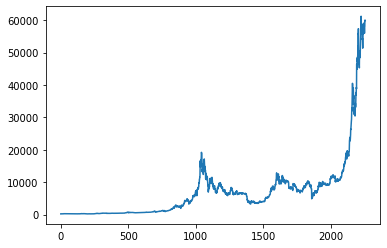

In [ ]:
bitcoin.open.plot()

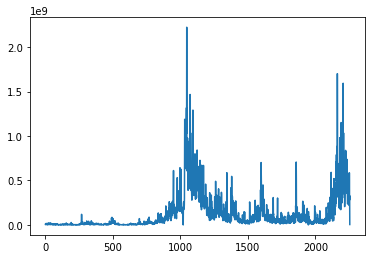

In [ ]:
y = bitcoin["Volume USD"].plot()
x = bitcoin["date"].dt.year

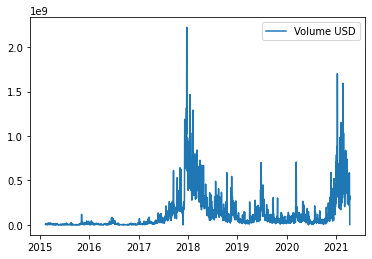

In [ ]:
import matplotlib.pyplot as plt

plt.plot(bitcoin["date"], bitcoin["Volume USD"], label="Volume USD")
plt.legend()
plt.show()

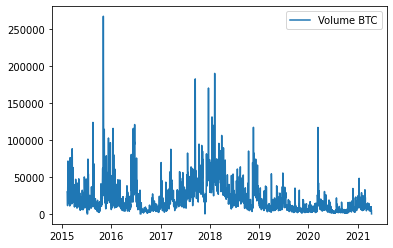

In [ ]:
plt.plot(bitcoin["date"], bitcoin["Volume BTC"], label="Volume BTC")
plt.legend()
plt.show()

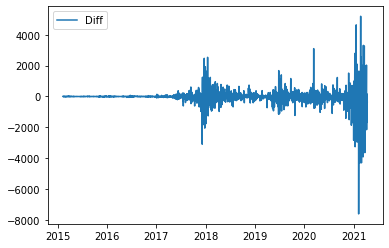

In [ ]:
plt.plot(bitcoin["date"], (bitcoin["open"] - bitcoin["close"]), label="Diff")
plt.legend()
plt.show()


In [ ]:
# create new column
# Feature Engineering

bitcoin["openclose_diff"] = bitcoin["open"] - bitcoin["close"]
bitcoin["highlow_diff"] = bitcoin["high"] - bitcoin["low"]
bitcoin["open2high"] = bitcoin["openclose_diff"] / bitcoin["highlow_diff"]

In [ ]:
bitcoin.head()

,date,symbol,open,high,low,close,Volume USD,Volume BTC,openclose_diff,highlow_diff,open2high
0,2015-02-09,BTC/USD,224.22,225.00,215.40,220.61,6493501.42,29625.03,3.61,9.60,0.376042
1,2015-02-10,BTC/USD,220.61,223.88,214.00,220.96,6402350.57,29268.95,-0.35,9.88,-0.035425
2,2015-02-11,BTC/USD,220.96,224.40,218.10,219.19,4268986.79,19289.28,1.77,6.30,0.280952
3,2015-02-12,BTC/USD,219.19,223.20,217.87,222.60,2468883.37,11190.65,-3.41,5.33,-0.639775
4,2015-02-13,BTC/USD,222.39,241.76,221.46,236.00,6806972.89,29079.11,-13.61,20.30,-0.670443


In [ ]:
# Feature Engineering
bitcoin[["date", "close"]].head(10)

,date,close
0,2015-02-09,220.61
1,2015-02-10,220.96
2,2015-02-11,219.19
3,2015-02-12,222.60
4,2015-02-13,236.00
5,2015-02-14,258.12
6,2015-02-15,234.14
7,2015-02-16,236.78
8,2015-02-17,242.87
9,2015-02-18,234.80


In [ ]:
bitcoin["close_max_7d"] = bitcoin["close"].shift(1).rolling(window=7).max()
bitcoin["open_mean_14d"] = bitcoin["open"].shift(1).rolling(window=14).mean()
bitcoin["weekday"] = bitcoin["date"].dt.weekday
bitcoin["month"] = bitcoin["date"].dt.month
bitcoin["year"] = bitcoin["date"].dt.year

In [ ]:
bitcoin.head()

,date,symbol,open,high,low,close,Volume USD,Volume BTC,openclose_diff,highlow_diff,open2high,close_max_7d,open_mean_14d,weekday,month,year
0,2015-02-09,BTC/USD,224.22,225.00,215.40,220.61,6493501.42,29625.03,3.61,9.60,0.376042,NaN,NaN,0,2,2015
1,2015-02-10,BTC/USD,220.61,223.88,214.00,220.96,6402350.57,29268.95,-0.35,9.88,-0.035425,NaN,NaN,1,2,2015
2,2015-02-11,BTC/USD,220.96,224.40,218.10,219.19,4268986.79,19289.28,1.77,6.30,0.280952,NaN,NaN,2,2,2015
3,2015-02-12,BTC/USD,219.19,223.20,217.87,222.60,2468883.37,11190.65,-3.41,5.33,-0.639775,NaN,NaN,3,2,2015
4,2015-02-13,BTC/USD,222.39,241.76,221.46,236.00,6806972.89,29079.11,-13.61,20.30,-0.670443,NaN,NaN,4,2,2015


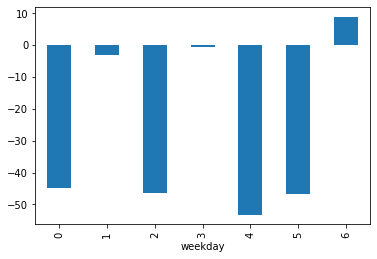

In [ ]:
bitcoin.groupby("weekday")["openclose_diff"].mean().plot(kind="bar")

In [ ]:
for day in range(1, 15):
  bitcoin[f"close_d{day}"] = bitcoin["close"].shift(day)

In [ ]:
bitcoin.head(15)

,date,symbol,open,high,low,close,Volume USD,Volume BTC,openclose_diff,highlow_diff,open2high,close_max_7d,open_mean_14d,weekday,month,year,close_d1,close_d2,close_d3,close_d4,close_d5,close_d6,close_d7,close_d8,close_d9,close_d10,close_d11,close_d12,close_d13,close_d14
0,2015-02-09,BTC/USD,224.22,225.00,215.40,220.61,6493501.42,29625.03,3.61,9.60,0.376042,NaN,NaN,0,2,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-02-10,BTC/USD,220.61,223.88,214.00,220.96,6402350.57,29268.95,-0.35,9.88,-0.035425,NaN,NaN,1,2,2015,220.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-02-11,BTC/USD,220.96,224.40,218.10,219.19,4268986.79,19289.28,1.77,6.30,0.280952,NaN,NaN,2,2,2015,220.96,220.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-02-12,BTC/USD,219.19,223.20,217.87,222.60,2468883.37,11190.65,-3.41,5.33,-0.639775,NaN,NaN,3,2,2015,219.19,220.96,220.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-02-13,BTC/USD,222.39,241.76,221.46,236.00,6806972.89,29079.11,-13.61,20.30,-0.670443,NaN,NaN,4,2,2015,222.60,219.19,220.96,220.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-02-14,BTC/USD,236.13,261.30,235.51,258.12,10739014.48,42984.94,-21.99,25.79,-0.852656,NaN,NaN,5,2,2015,236.00,222.60,219.19,220.96,220.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2015-02-15,BTC/USD,257.00,266.84,228.20,234.14,17384420.70,71361.28,22.86,38.64,0.591615,NaN,NaN,6,2,2015,258.12,236.00,222.60,219.19,220.96,220.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2015-02-16,BTC/USD,234.14,243.65,228.62,236.78,10798751.12,45750.85,-2.64,15.03,-0.175649,258.12,NaN,0,2,2015,234.14,258.12,236.00,222.60,219.19,220.96,220.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2015-02-17,BTC/USD,236.78,246.28,231.50,242.87,10228035.45,42669.08,-6.09,14.78,-0.412043,258.12,NaN,1,2,2015,236.78,234.14,258.12,236.00,222.60,219.19,220.96,220.61,NaN,NaN,NaN,NaN,NaN,NaN
9,2015-02-18,BTC/USD,242.87,244.99,231.01,234.80,9164141.83,38588.38,8.07,13.98,0.577253,258.12,NaN,2,2,2015,242.87,236.78,234.14,258.12,236.00,222.60,219.19,220.96,220.61,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = pd.get_dummies(bitcoin, columns=["year", "month", "weekday"])
df.fillna(method="bfill", inplace=True)   # another variant is to use df.dropna()

In [ ]:
df.drop("date", axis=1, inplace=True)


In [ ]:
df.head()
df.drop("symbol", axis=1, inplace=True)

In [ ]:
df.head()

,open,high,low,close,Volume USD,Volume BTC,openclose_diff,highlow_diff,open2high,close_max_7d,open_mean_14d,close_d1,close_d2,close_d3,close_d4,close_d5,close_d6,close_d7,close_d8,close_d9,close_d10,close_d11,close_d12,close_d13,close_d14,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,224.22,225.00,215.40,220.61,6493501.42,29625.03,3.61,9.60,0.376042,258.12,234.401429,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,220.61,223.88,214.00,220.96,6402350.57,29268.95,-0.35,9.88,-0.035425,258.12,234.401429,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,220.96,224.40,218.10,219.19,4268986.79,19289.28,1.77,6.30,0.280952,258.12,234.401429,220.96,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,219.19,223.20,217.87,222.60,2468883.37,11190.65,-3.41,5.33,-0.639775,258.12,234.401429,219.19,220.96,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,222.39,241.76,221.46,236.00,6806972.89,29079.11,-13.61,20.30,-0.670443,258.12,234.401429,222.60,219.19,220.96,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,220.61,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(data=scaler.transform(df), columns=df.columns)

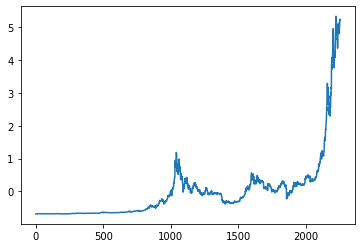

In [ ]:
df.close.plot()

In [ ]:
#Vyborka
X =df.drop(["close", "high", "low", "open"], axis=1)
y = df["close"]

# Training = Textbook (X_train, y_train)



# TESTING = Exam (X_test, y_test)



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train) # насколько модель поняла учебник
test_score = model.score(X_test, y_test) # насколько модель поняла учебник

print(f"train_score = {train_score}, test_score = {test_score}")

train_score = 0.9999997883943917, test_score = 0.9999996578857807


In [ ]:
pd.DataFrame(data=[model.coef_], columns=X.columns).T

,0
Volume USD,9.404581e-05
Volume BTC,-2.075101e-05
openclose_diff,-5.189160e-02
highlow_diff,2.091671e-05
open2high,3.358279e-05
close_max_7d,-2.879690e-03
open_mean_14d,-1.683003e-03
close_d1,9.951703e-01
close_d2,3.719339e-04
close_d3,-1.109279e-04


In [ ]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test)
print("max_error", max_error(y_pred, y_test))
print("mean_absolute_error", mean_absolute_error(y_pred, y_test))

max_error 0.012366882350501457
mean_absolute_error 0.00015063674952847295


In [ ]:
pd.DataFrame(data=[model.coef_], columns=X.columns).T

,0
Volume USD,9.404581e-05
Volume BTC,-2.075101e-05
openclose_diff,-5.189160e-02
highlow_diff,2.091671e-05
open2high,3.358279e-05
close_max_7d,-2.879690e-03
open_mean_14d,-1.683003e-03
close_d1,9.951703e-01
close_d2,3.719339e-04
close_d3,-1.109279e-04


In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
def train_test_model(model, coef=True):
  model.fit(X_train, y_train)
  train_score = model.score(X_train, y_train) # насколько модель поняла учебник
  test_score = model.score(X_test, y_test) # насколько модель поняла учебник

  print(f"train_score = {train_score}, test_score = {test_score}")

  y_pred = model.predict(X_test)
  print("max_error", max_error(y_pred, y_test))
  print("mean_absolute_error", mean_absolute_error(y_pred, y_test))
  if (coef):
    print(pd.DataFrame(data=[model.coef_], columns=X.columns).T) # 
  else:
    print(pd.DataFrame(data=[model.feature_importances_], columns=X.columns).T)

In [ ]:
train_test_model(Lasso())

train_score = 0.11946961690712532, test_score = 0.11784283320106492
max_error 5.023504448907784
mean_absolute_error 0.5300425554764578
                       0
Volume USD      0.000000
Volume BTC     -0.000000
openclose_diff -0.000000
highlow_diff    0.000000
open2high      -0.000000
close_max_7d    0.000000
open_mean_14d   0.000000
close_d1        0.061619
close_d2        0.000000
close_d3        0.000000
close_d4        0.000000
close_d5        0.000000
close_d6        0.000000
close_d7        0.000000
close_d8        0.000000
close_d9        0.000000
close_d10       0.000000
close_d11       0.000000
close_d12       0.000000
close_d13       0.000000
close_d14       0.000000
year_2015      -0.000000
year_2016      -0.000000
year_2017      -0.000000
year_2018       0.000000
year_2019       0.000000
year_2020       0.000000
year_2021       0.000000
month_1         0.000000
month_2         0.000000
month_3         0.000000
month_4         0.000000
month_5        -0.000000
month_6        

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(n_estimators=1000, criterion="mae")
train_test_model(rfr, coef=False)

train_score = 0.9996414909498753, test_score = 0.9975994376857825
max_error 0.4174368337145995
mean_absolute_error 0.01606871022361393
                           0
Volume USD      9.940343e-04
Volume BTC      1.174209e-03
openclose_diff  6.890308e-03
highlow_diff    1.775356e-03
open2high       4.447104e-03
close_max_7d    3.152898e-02
open_mean_14d   2.224765e-02
close_d1        5.543782e-01
close_d2        1.329784e-01
close_d3        4.691648e-02
close_d4        2.174716e-02
close_d5        2.142237e-02
close_d6        1.339609e-02
close_d7        6.306664e-03
close_d8        1.201180e-02
close_d9        1.199037e-02
close_d10       9.143505e-03
close_d11       2.065995e-02
close_d12       1.509087e-02
close_d13       2.359759e-02
close_d14       1.828979e-02
year_2015       2.702838e-07
year_2016       7.301700e-07
year_2017       7.783789e-05
year_2018       7.632331e-05
year_2019       6.060499e-05
year_2020       8.226699e-05
year_2021       2.061740e-02
month_1         2.191470

## Подбор Гиперпараметров

Мы указываем диапазон значений, GridSearch перебором находит наилучший набор настроек модели.



In [ ]:
 from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(random_state=42)
param_grid = {"n_estimators": [50, 100, 400],
              "min_samples_split": [2, 5, 10]}
gs = GridSearchCV(model, param_grid, scoring='max_error', cv=5)

In [ ]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [ ]:
gs.best_params_

{'min_samples_split': 2, 'n_estimators': 100}

In [ ]:
gs.best_score_

-0.5560743600405448

In [ ]:
best_model = gs.best_estimator_

In [ ]:
import pickle # for creating and saving models as files

In [ ]:
pickle.dump(best_model, open("RF.model", "wb")) # let to save model into file (binary file - 'wb')

In [ ]:
loaded_model = pickle.load(open("RF.model", "rb"))

In [ ]:
loaded_model.predict(X_test)

array([-1.54392881e-02,  1.01212700e-01, -3.57923021e-01,  3.49462318e-02,
       -6.60587277e-01, -1.10633965e-01, -6.60877863e-01, -4.88233729e-01,
        1.61959409e-01,  3.56050315e-02, -6.81296413e-01,  4.30179114e-01,
       -6.79597041e-01, -6.45820030e-01,  1.66537502e-01,  3.01635026e+00,
       -2.74122502e-01,  4.42694677e-01, -4.06520773e-01, -6.62850115e-01,
        4.72748640e-01, -6.79846306e-01, -5.02513838e-02,  2.41485276e-01,
        4.36804872e-01, -1.63752182e-02,  2.14216422e-02,  4.30103616e-02,
       -6.83390109e-01,  4.20151461e-01,  1.72983160e-01,  6.59373509e-01,
       -5.06365942e-01,  8.33804592e-01, -6.40367165e-01,  5.07695493e-01,
       -4.62685942e-02,  1.35889911e-02, -4.41307777e-01, -6.81280317e-01,
        3.52303069e-01, -1.16474769e-01, -6.65785661e-01, -6.81670062e-01,
       -6.44169295e-01,  2.40515986e-01,  3.13654427e-01, -6.73328938e-01,
       -1.50780106e-01,  2.09089729e-01,  6.25790870e-02,  1.06947508e+00,
       -6.80687516e-01, -

## Кросс-валидация

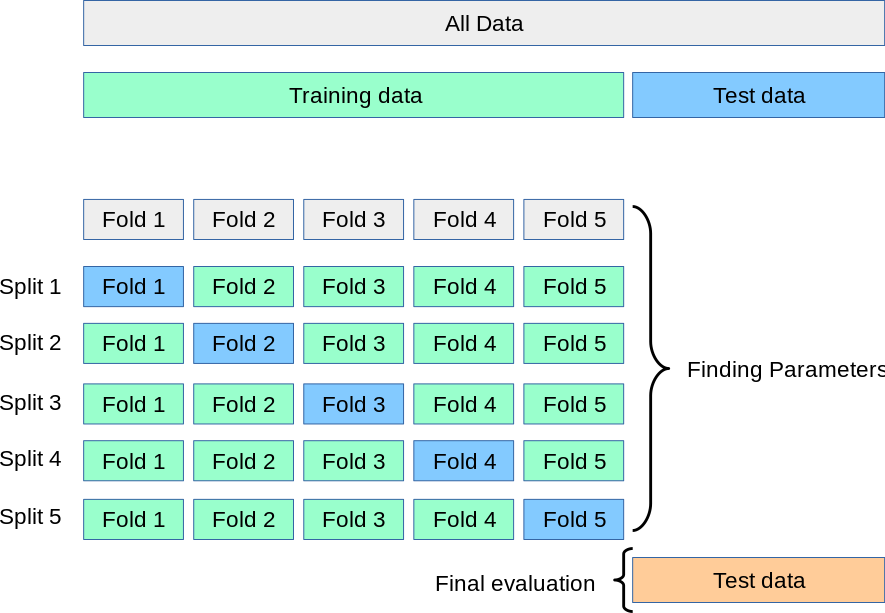

## Градиентный спуск

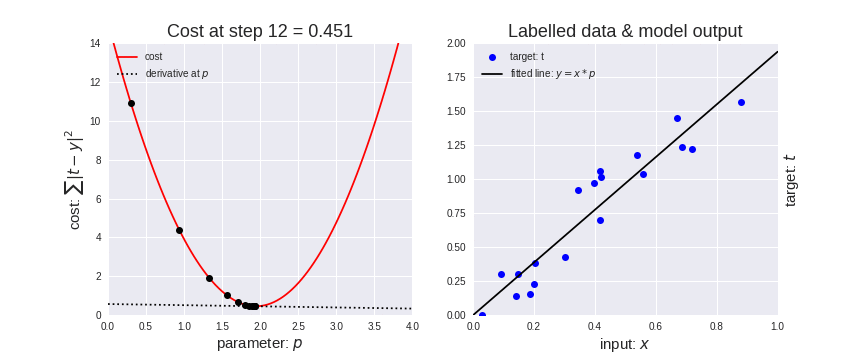